In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor

In [3]:
downsample_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/downsample_data.csv')

Model 7: Generic Random Forest Regressor Model for RFL attenuation

In [7]:
# Prepare data
X = downsample_data.drop(columns=['FSO_Att', 'RFL_Att'])
y_rfl = downsample_data['RFL_Att']
X_train_rfl, X_test_rfl, y_train_rfl, y_test_rfl = train_test_split(X, y_rfl,
                                              test_size=0.25, random_state=42)

# Initialize RandomForestRegressor
rf_rfl = RandomForestRegressor(n_estimators=100, random_state=42,
                               oob_score=True, bootstrap=True)

# Store results
results = []

# Loop to remove the least important feature iteratively
# Continue until you have 0 features
for num_features in range(X_train_rfl.shape[1], 0, -1):
    # Train the model
    rf_rfl.fit(X_train_rfl, y_train_rfl)
    y_pred_rfl = rf_rfl.predict(X_test_rfl)

    # Calculate RMSE and R2
    rmse_rfl = round(np.sqrt(mean_squared_error(y_test_rfl, y_pred_rfl)), 2)
    r2_rfl = round(r2_score(y_test_rfl, y_pred_rfl), 2)
    oob_score_rfl = round(rf_rfl.oob_score_, 2)

    # Feature Importance
    importances_rfl = rf_rfl.feature_importances_
    indices_rfl = np.argsort(importances_rfl)[::-1]

    # Identify and remove the least important feature
    least_important_feature_rfl = X_train_rfl.columns[indices_rfl[-1]]
    print(f"Removing least important feature: {least_important_feature_rfl}")

    # Store the performance metrics and the least important feature
    results.append((num_features, least_important_feature_rfl, rmse_rfl, r2_rfl,
                    oob_score_rfl))

    # Drop the least important feature from the dataset
    X_train_rfl = X_train_rfl.drop(columns=[least_important_feature_rfl])
    X_test_rfl = X_test_rfl.drop(columns=[least_important_feature_rfl])

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results, columns=['Num_Features',
                        'Least_Important_Feature', 'RMSE', 'R2', 'OOB_Score'])

# Display the results
print("Performance metrics after each feature removal:")
print(results_df)

# Find the number of features that gives the best RMSE
optimal_features = results_df.loc[results_df['RMSE'].idxmin()]['Num_Features']
print(f"The optimal number of features is: {optimal_features}")


Removing least important feature: WindSpeedMin
Removing least important feature: SYNOPCode
Removing least important feature: Frequency
Removing least important feature: Particulate
Removing least important feature: Visibility
Removing least important feature: WindSpeed
Removing least important feature: TemperatureMax
Removing least important feature: WindDirection
Removing least important feature: ParticulateMin
Removing least important feature: Temperature
Removing least important feature: VisibilityMin
Removing least important feature: Time
Removing least important feature: WindSpeedMax
Removing least important feature: TemperatureDifference
Removing least important feature: ParticulateMax
Removing least important feature: TemperatureMin
Removing least important feature: VisibilityMax
Removing least important feature: RelativeHumidity
Removing least important feature: AbsoluteHumidityMax
Removing least important feature: RainIntensityMax
Removing least important feature: AbsoluteHumi

In [8]:
results_df_rfl1 =  results_df.drop(columns=['Num_Features','OOB_Score'])
results_df_rfl1

,Least_Important_Feature,RMSE,R2
0,WindSpeedMin,0.97,0.87
1,SYNOPCode,0.97,0.87
2,Frequency,0.96,0.87
3,Particulate,1.00,0.86
4,Visibility,1.00,0.86
5,WindSpeed,1.00,0.86
6,TemperatureMax,0.98,0.86
7,WindDirection,0.99,0.86
8,ParticulateMin,0.98,0.86
9,Temperature,0.97,0.87


Model 8: Generic Extra Tree Regressor For RSL attenuation

In [4]:
# Prepare data
X = downsample_data.drop(columns=['FSO_Att', 'RFL_Att'])
y_rfl = downsample_data['RFL_Att']
X_train_rfl, X_test_rfl, y_train_rfl, y_test_rfl = train_test_split(X, y_rfl,
                                              test_size=0.25, random_state=42)

# Initialize Extra Trees Regressor
et_rfl = ExtraTreesRegressor(n_estimators=100, random_state=42, bootstrap=True,
                             oob_score=True)

# Store results
results = []

# Loop to remove least important feature iteratively
# Continue until you have 0 features
for num_features in range(X_train_rfl.shape[1], 0, -1):
    # Train the model
    et_rfl.fit(X_train_rfl, y_train_rfl)
    y_pred_rfl = et_rfl.predict(X_test_rfl)

    # Calculate RMSE and R2
    rmse_rfl = round(np.sqrt(mean_squared_error(y_test_rfl, y_pred_rfl)), 2)
    r2_rfl = round(r2_score(y_test_rfl, y_pred_rfl), 2)
    oob_score_rfl = round(et_rfl.oob_score_, 2)

    # Feature Importance
    importances_rfl = et_rfl.feature_importances_
    indices_rfl = np.argsort(importances_rfl)[::-1]

    # Identify and remove the least important feature
    least_important_feature_rfl = X_train_rfl.columns[indices_rfl[-1]]
    print(f"Removing least important feature: {least_important_feature_rfl}")

    # Store the performance metrics and the least important feature
    results.append((num_features, least_important_feature_rfl, rmse_rfl, r2_rfl,
                    oob_score_rfl))

    # Drop the least important feature from the dataset
    X_train_rfl = X_train_rfl.drop(columns=[least_important_feature_rfl])
    X_test_rfl = X_test_rfl.drop(columns=[least_important_feature_rfl])

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results, columns=['Num_Features',
              'Least_Important_Feature', 'RMSE', 'R2', 'OOB_Score'])

# Display the results
print("Performance metrics after each feature removal:")
print(results_df)

# Find the number of features that gives the best RMSE
optimal_features = results_df.loc[results_df['RMSE'].idxmin()]['Num_Features']
print(f"The optimal number of features is: {optimal_features}")


Removing least important feature: WindSpeed
Removing least important feature: WindDirection
Removing least important feature: WindSpeedMin
Removing least important feature: TemperatureDifference
Removing least important feature: WindSpeedMax
Removing least important feature: Visibility
Removing least important feature: Frequency
Removing least important feature: VisibilityMax
Removing least important feature: Time
Removing least important feature: VisibilityMin
Removing least important feature: SYNOPCode
Removing least important feature: RelativeHumidity
Removing least important feature: ParticulateMin
Removing least important feature: ParticulateMax
Removing least important feature: TemperatureMax
Removing least important feature: TemperatureMin
Removing least important feature: Particulate
Removing least important feature: Temperature
Removing least important feature: RainIntensityMin
Removing least important feature: AbsoluteHumidityMax
Removing least important feature: RainIntensit

In [9]:
results_df_rfl2 =  results_df.drop(columns=['Num_Features','OOB_Score'])
results_df_rfl2

,Least_Important_Feature,RMSE,R2
0,WindSpeedMin,0.97,0.87
1,SYNOPCode,0.97,0.87
2,Frequency,0.96,0.87
3,Particulate,1.00,0.86
4,Visibility,1.00,0.86
5,WindSpeed,1.00,0.86
6,TemperatureMax,0.98,0.86
7,WindDirection,0.99,0.86
8,ParticulateMin,0.98,0.86
9,Temperature,0.97,0.87


Plots

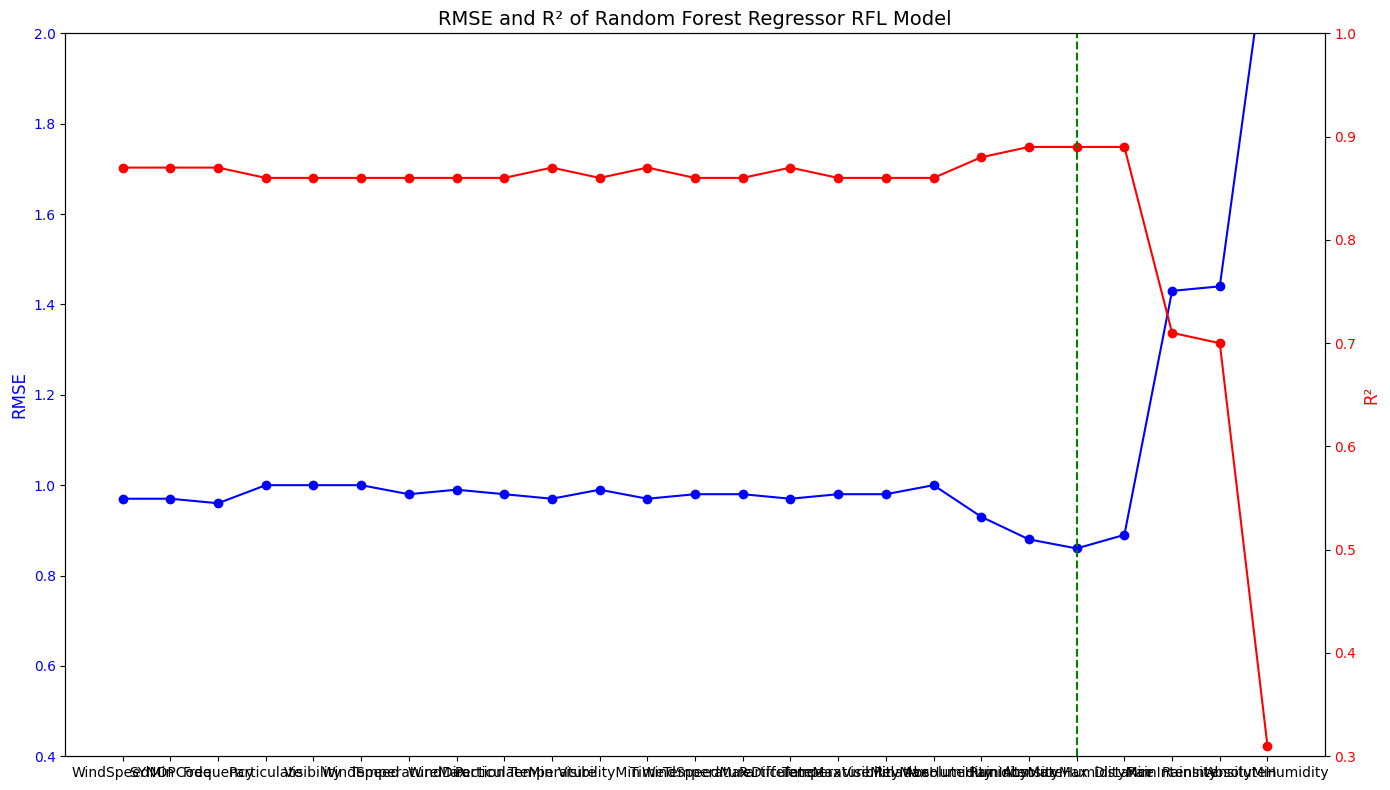

In [36]:
optimal_feature_index = 20

# Plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot RMSE in blue
ax1.plot(results_df_rfl1['Least_Important_Feature'], results_df_rfl1['RMSE'],
         color='blue', marker='o', label='RMSE')
ax1.set_ylabel('RMSE', color='blue', fontsize=12)
ax1.set_ylim(0.4, 2)
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for R2 with a shared x-axis
ax2 = ax1.twinx()
ax2.plot(results_df_rfl1['Least_Important_Feature'], results_df_rfl1['R2'],
         color='red', marker='o', label='R²')
ax2.set_ylabel('R²', color='red', fontsize=12)
ax2.set_ylim(0.3, 1)
ax2.tick_params(axis='y', labelcolor='red')

# Add a vertical green line at the optimal number of features
plt.axvline(x=optimal_feature_index, color='green', linestyle='--',
            label='Optimal Features')

plt.xticks(rotation=45, ha='right', fontsize=10)


# Add title
plt.title('RMSE and R² of Random Forest Regressor RFL Model', fontsize=14)

# Adjust layout to fit everything
plt.tight_layout()

# Show plot
plt.show()

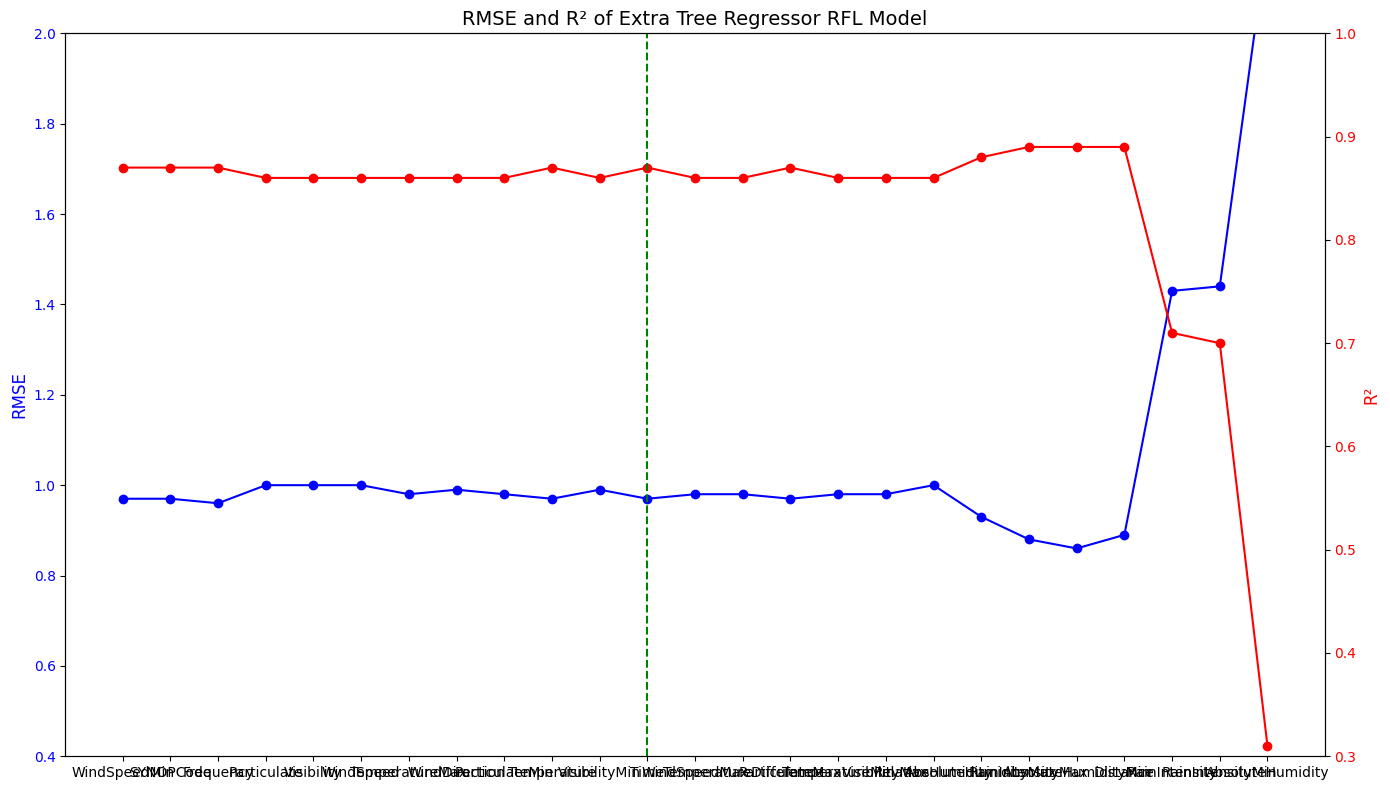

In [37]:
optimal_feature_index = 11

# Plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot RMSE in blue
ax1.plot(results_df_rfl2['Least_Important_Feature'], results_df_rfl2['RMSE'],
         color='blue', marker='o', label='RMSE')
ax1.set_ylabel('RMSE', color='blue', fontsize=12)
ax1.set_ylim(0.4, 2)
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for R2 with a shared x-axis
ax2 = ax1.twinx()
ax2.plot(results_df_rfl2['Least_Important_Feature'], results_df_rfl2['R2'],
         color='red', marker='o', label='R²')
ax2.set_ylabel('R²', color='red', fontsize=12)
ax2.set_ylim(0.3, 1)
ax2.tick_params(axis='y', labelcolor='red')

# Add a vertical green line at the optimal number of features
plt.axvline(x=optimal_feature_index, color='green', linestyle='--', label='Optimal Features')

# Rotate x-axis labels to 45 degrees and use a smaller font size for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)


# Add title
plt.title('RMSE and R² of Extra Tree Regressor RFL Model', fontsize=14)

# Adjust layout to fit everything
plt.tight_layout()

# Show plot
plt.show()

In [34]:
# Create a DataFrame with the given data
data = {
    'Model': ['Random Forest Regressor', 'Extra Trees Regressor'],
    'Optimal Features': [5, 11],
    'RMSE': [0.86, 0.73],
    'R2': [0.89, 0.92]
}

results_df = pd.DataFrame(data)

# Display the table
print("Model Performance Comparison:")
print(results_df.to_string(index=False))

Model Performance Comparison:
                  Model  Optimal Features  RMSE   R2
Random Forest Regressor                 5  0.86 0.89
  Extra Trees Regressor                11  0.73 0.92


The best Model is Extra Trees Regressor with 11 features